In [1]:
%load_ext rpy2.ipython

In [2]:
import os
os.chdir("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_h5")

In [3]:
%%R 
library(ClusterGVis)
library(data.table)
library(tidyverse)
library(data.table)
library(tidyverse)
library(tidyverse)
library("clusterProfiler")
library("org.Hs.eg.db")
library(ggplot2)
library(RColorBrewer)
library(gridExtra)
library(enrichplot)
library(ggsci)
library(ggrepel)
source("~/mao/Codeman/Project/All_Gao_ScanpyProject/Mainfun.R")

R[write to console]: 载入需要的程辑包：monocle

R[write to console]: 载入需要的程辑包：Matrix

R[write to console]: 载入需要的程辑包：Biobase

R[write to console]: 载入需要的程辑包：BiocGenerics

R[write to console]: 
载入程辑包：‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


R[write to console]: Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkg

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::combine()     masks Biobase::combine(), BiocGenerics::combine()
✖ tidyr::expand()      masks Matrix::expand()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ tidyr::pack()        masks Matrix::pack()
✖ ggplot2::Position()  masks BiocG

R[write to console]: 

R[write to console]: clusterProfiler v4.7.1.002  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141

R[write to console]: 
载入程辑包：‘clusterProfiler’


R[write to console]: The following object is masked from ‘package:purrr’:

    simplify


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: 载入需要的程辑包：AnnotationDbi

R[write to console]: 载入需要的程辑包：IRanges

R[write to console]: 载入需要的程辑包：S4Vectors

R[write to console]: 
载入程辑包：‘S4Vectors’


R[write to console]: The following object is masked from ‘package:clusterProfiler’:

    rename


R[write to console]: The following objects are masked from ‘package:lubridate’:

    second, 

In [4]:
%%R
Cell=read.table("/home/maolp/data5/chenjinpeng0518021/X101SC23043192-Z01-J001/Cell_A04.Count/CellAll_count.txt",header = T)
Cell$Geneid<-substring(Cell$Geneid,1,15)

In [5]:
%%R
# library(tidyverse)
colnames(Cell)<-gsub('.sorted.bam','',colnames(Cell))
colnames(Cell)<-gsub('Cell_A03.Alignment.','Z',colnames(Cell))
colnames(Cell)<-gsub('ZD','D',colnames(Cell))
colnames(Cell)<-gsub('ZB','B',colnames(Cell))
colnames(Cell)<-gsub('ZC','C',colnames(Cell))

In [6]:
%%R
library(rtracklayer)
gff <- readGFF("~/mao/Ref/AllnewstarRef/Homo/Data/Homo_sapiens.GRCh38.108.gtf")
mapid_gene <- gff[gff$type == "gene", c("gene_id","transcript_id", "gene_name","transcript_name")]

In [7]:
%%R
HC_genes_counts_merge<-merge(Cell,mapid_gene,by.x="Geneid",by.y="gene_id")
HC_genes_counts_merge<-HC_genes_counts_merge[which(!is.na(HC_genes_counts_merge$gene_name)),]
HC_genes_counts_merge<-HC_genes_counts_merge[!duplicated(HC_genes_counts_merge$gene_name),]

In [8]:
%%R
countToTpm <- function(counts, effLen)
{
  rate <- log(counts) - log(effLen)
  denom <- log(sum(exp(rate)))
  exp(rate - denom + log(1e6))
}
data=Cell

In [9]:
%%R
colnames(HC_genes_counts_merge)
expdata<-as.data.frame(HC_genes_counts_merge[,-c(1:6,33:35)])
rownames(expdata)<-HC_genes_counts_merge$gene_name
expdata_tpm=as.data.frame(apply(expdata, 2, function(x)countToTpm(x,HC_genes_counts_merge$Length))  )
apply(expdata_tpm, 2, function(x)sum(x))

 Z100   Z33   Z38    Z3   Z43   Z47   Z48   Z50   Z52   Z53   Z67   Z70   Z79 
1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 
   Z7   Z96   Z98   Z99   B25   B26    B9   C10   C25   C27   D25   D26    D9 
1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 1e+06 


In [10]:
%%R
Olinkmeta=read.csv('../All_scanpyData/MetaData/Olinkgene.csv')

In [11]:
%%R
Olinkmeta %>% head()

   OlinkID UniProt Assay  Gene
1 OID00471  P10145   IL8 CXCL8
2 OID00472  P15692 VEGFA VEGFA
3 OID00474  P80098 MCP-3  CCL7
4 OID00475  P39905  GDNF  GDNF
5 OID00476  Q9H5V8 CDCP1 CDCP1
6 OID00477  Q9BZW8 CD244 CD244


In [12]:
%%R
setdiff(Olinkmeta$Gene,rownames(expdata_tpm))

character(0)


In [13]:
ls /home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/MetaData/

8D6C2EAD.tmp.csv                 Olinkgene.csv
Fteal_Figure12A_SampleData.csv   Organmeta.csv
Fteal_Figure12A_SampleData.xlsx  SampleMeta.csv
GaoAllSample_MetaData.csv        Sample_MetainRNAseq.csv


In [14]:
%%R

Sample_MetainRNAseq=read.csv("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/MetaData/Sample_MetainRNAseq.csv")
# Sample_Meta[which(Sample_Meta$Name=='Z03'),1]='Z3'
# Sample_MetainRNAseq=Sample_Meta[Sample_Meta$Name %in% colnames(expdata),]
# dim(Sample_Meta)

In [15]:
%%R
Sample_MetainRNAseq<-arrange(Sample_MetainRNAseq,AdjustedID)
Sample_MetainRNAseqZ=Sample_MetainRNAseq[1:17,]
Sample_MetainRNAseqZ=Sample_MetainRNAseqZ[!grepl('P6',Sample_MetainRNAseqZ$AdjustedID),]
Sample_MetainRNAseqZ

   Name AdjustedID Week
1   Z48     B19.P3   19
2   Z67     B20.P4   20
3   Z99     B21.P5   21
5    Z3     B23.P7   23
6   Z79     B24.P8   24
7   Z43     B24.P9   24
8   Z53    B25.P10   25
9   Z47    B27.P11   27
10   Z7    B29.P12   29
11  Z38    B33.P15   33
12  Z98    B35.P17   35
13  Z33    B36.P18   36
14  Z70    B38.P19   38
15  Z52    B40.P20   40
16  Z50    B40.P21   40
17  Z96    B41.P22   41


In [16]:
%%R
Sample_MetainRNAseq<-Sample_MetainRNAseq[!grepl('P6',Sample_MetainRNAseq$AdjustedID),]
Sample_MetainRNAseq

   Name AdjustedID Week
1   Z48     B19.P3   19
2   Z67     B20.P4   20
3   Z99     B21.P5   21
5    Z3     B23.P7   23
6   Z79     B24.P8   24
7   Z43     B24.P9   24
8   Z53    B25.P10   25
9   Z47    B27.P11   27
10   Z7    B29.P12   29
11  Z38    B33.P15   33
12  Z98    B35.P17   35
13  Z33    B36.P18   36
14  Z70    B38.P19   38
15  Z52    B40.P20   40
16  Z50    B40.P21   40
17  Z96    B41.P22   41
18  C27     L12.P1   12
19  C25     L21.P5   21
20  C10    L27.P11   27
21  B25     S21.P5   21
23   B9    S27.P11   27
24  D25     T21.P5   21
26   D9    T27.P11   27


In [17]:
%%R
Sample_MetainRNAseq$Organ<-substring(Sample_MetainRNAseq$AdjustedID,1,1)

In [18]:
%%R
expdata6=expdata[,Sample_MetainRNAseq$Name]
all(colnames(expdata6)==Sample_MetainRNAseq$Name)
colnames(expdata6)<-Sample_MetainRNAseq$AdjustedID

NULL


In [21]:
%%R
expdata6_tpm=as.data.frame(apply(expdata6, 2, function(x)countToTpm(x,HC_genes_counts_merge$Length))  )

In [22]:
%%R
head(expdata6_tpm)

             B19.P3      B20.P4      B21.P5      B23.P7     B24.P8      B24.P9
TSPAN6    0.7576279   0.7059208   0.4025263   0.3378728   3.271548   0.9206454
TNMD      0.0000000   0.0000000   0.0000000   0.0000000   0.000000   0.0000000
DPM1     91.0911067 187.2538199 204.4397771 168.2957493 153.701920 188.1088389
SCYL3     6.6390684   9.8293203  11.7161470  10.3833587  10.614596   8.9543547
C1orf112 11.4009863  18.8493584  19.2013174  19.4058234  19.013803  21.3742553
FGR       7.3187207   4.3311308  11.0038036   6.5214321  13.494030   3.6913079
             B25.P10    B27.P11    B29.P12     B33.P15     B35.P17     B36.P18
TSPAN6     0.7476833   1.161901   1.085012   0.4778094   0.7784679   0.6801327
TNMD       0.0000000   0.000000   0.000000   0.0000000   0.0000000   0.0000000
DPM1     182.7004598 176.440980 158.698543 181.7689808 175.9001216 175.8299450
SCYL3      8.4626089  11.706398   8.970059  10.0897934  11.7256675  10.8271288
C1orf112  17.1286594  18.415480  18.102449  20.15435

In [23]:
%%R
expdata_tpm_olink=log2(expdata6_tpm[rownames(expdata6_tpm) %in% Olinkmeta$Gene, ]+1)
PBMC_tpm_olink =expdata_tpm_olink[,grepl('B',colnames(expdata_tpm_olink))]
expdata_tpm_olink %>% head()
PBMC_tpm_olink %>% head()

           B19.P3     B20.P4    B21.P5    B23.P7    B24.P8    B24.P9   B25.P10
CX3CL1  0.4874733 0.32158346 0.5873934 0.6480798 0.1155043 0.5180224 0.7554617
CD6     6.6444953 6.83897595 6.5398166 6.9057725 5.2009753 7.5020664 7.1706224
IL20RA  0.0000000 0.00000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
HGF     0.6592577 0.03419915 0.3119498 0.1354195 0.9552312 0.1815201 0.0387483
KITLG   0.2957692 0.19072861 0.2360715 0.0000000 0.5604806 0.0000000 0.0567204
TNFRSF9 5.7734770 6.12523453 5.1517561 4.9896660 5.6051592 5.8899747 5.8867352
          B27.P11   B29.P12   B33.P15  B35.P17    B36.P18   B38.P19    B40.P20
CX3CL1  0.1021764 0.9265641 0.4265996 0.278673 0.13721435 0.1034953 0.16067261
CD6     6.0520903 7.3943641 6.8541164 7.255241 7.57938926 7.6207686 7.27988416
IL20RA  0.0000000 0.0000000 0.0000000 0.000000 0.00000000 0.0000000 0.00000000
HGF     1.0859692 0.0000000 0.3968338 0.121915 0.03191230 0.0000000 0.03760381
KITLG   0.3270507 0.1078035 0.1474705 0.000000 0.092

In [24]:
%%R
PBMC_tpm_olink$OlinkGene=rownames(PBMC_tpm_olink)
PBMC_tpm_olink %>% head()

           B19.P3     B20.P4    B21.P5    B23.P7    B24.P8    B24.P9   B25.P10
CX3CL1  0.4874733 0.32158346 0.5873934 0.6480798 0.1155043 0.5180224 0.7554617
CD6     6.6444953 6.83897595 6.5398166 6.9057725 5.2009753 7.5020664 7.1706224
IL20RA  0.0000000 0.00000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
HGF     0.6592577 0.03419915 0.3119498 0.1354195 0.9552312 0.1815201 0.0387483
KITLG   0.2957692 0.19072861 0.2360715 0.0000000 0.5604806 0.0000000 0.0567204
TNFRSF9 5.7734770 6.12523453 5.1517561 4.9896660 5.6051592 5.8899747 5.8867352
          B27.P11   B29.P12   B33.P15  B35.P17    B36.P18   B38.P19    B40.P20
CX3CL1  0.1021764 0.9265641 0.4265996 0.278673 0.13721435 0.1034953 0.16067261
CD6     6.0520903 7.3943641 6.8541164 7.255241 7.57938926 7.6207686 7.27988416
IL20RA  0.0000000 0.0000000 0.0000000 0.000000 0.00000000 0.0000000 0.00000000
HGF     1.0859692 0.0000000 0.3968338 0.121915 0.03191230 0.0000000 0.03760381
KITLG   0.3270507 0.1078035 0.1474705 0.000000 0.092

In [25]:
%%R
PBMC_tpm_olink$OlinkGene=rownames(PBMC_tpm_olink)
PBMC_tpm_olink %>% head()

           B19.P3     B20.P4    B21.P5    B23.P7    B24.P8    B24.P9   B25.P10
CX3CL1  0.4874733 0.32158346 0.5873934 0.6480798 0.1155043 0.5180224 0.7554617
CD6     6.6444953 6.83897595 6.5398166 6.9057725 5.2009753 7.5020664 7.1706224
IL20RA  0.0000000 0.00000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
HGF     0.6592577 0.03419915 0.3119498 0.1354195 0.9552312 0.1815201 0.0387483
KITLG   0.2957692 0.19072861 0.2360715 0.0000000 0.5604806 0.0000000 0.0567204
TNFRSF9 5.7734770 6.12523453 5.1517561 4.9896660 5.6051592 5.8899747 5.8867352
          B27.P11   B29.P12   B33.P15  B35.P17    B36.P18   B38.P19    B40.P20
CX3CL1  0.1021764 0.9265641 0.4265996 0.278673 0.13721435 0.1034953 0.16067261
CD6     6.0520903 7.3943641 6.8541164 7.255241 7.57938926 7.6207686 7.27988416
IL20RA  0.0000000 0.0000000 0.0000000 0.000000 0.00000000 0.0000000 0.00000000
HGF     1.0859692 0.0000000 0.3968338 0.121915 0.03191230 0.0000000 0.03760381
KITLG   0.3270507 0.1078035 0.1474705 0.000000 0.092

In [46]:
%%R -w 3000 -h 3000 -r 200
PBMC_tpm_olink_long<- melt(PBMC_tpm_olink, id.vars=c('OlinkGene')) %>% 
mutate(sample_numeric =as.numeric(substring(variable,2,4)))
PBMC_tpm_olink_longP<- melt(PBMC_tpm_olink, id.vars=c('OlinkGene')) %>% 
mutate(sample_numeric = as.numeric(substring(variable,2,4)))%>%
group_by(OlinkGene) %>%
  summarise(r = cor.test(sample_numeric, value,method = "spearman")$estimate,
            p = cor.test(sample_numeric, value,method = "spearman")$p.value)
PBMC_tpm_olink_long %>% head()
PBMC_tpm_olink_longP %>% head()

# A tibble: 6 × 3
  OlinkGene      r      p
  <chr>      <dbl>  <dbl>
1 ADA        0.414  0.111
2 ARTN      -0.103  0.704
3 AXIN1      0.228  0.395
4 CASP8      0.325  0.219
5 CCL11     NA     NA    
6 CCL13     -0.130  0.632


In [ ]:
mkdir -p ../All_scanpyData/RNARresults/

In [27]:
%%R
head(PBMC_tpm_olink)

           B19.P3     B20.P4    B21.P5    B23.P7    B24.P8    B24.P9   B25.P10
CX3CL1  0.4874733 0.32158346 0.5873934 0.6480798 0.1155043 0.5180224 0.7554617
CD6     6.6444953 6.83897595 6.5398166 6.9057725 5.2009753 7.5020664 7.1706224
IL20RA  0.0000000 0.00000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
HGF     0.6592577 0.03419915 0.3119498 0.1354195 0.9552312 0.1815201 0.0387483
KITLG   0.2957692 0.19072861 0.2360715 0.0000000 0.5604806 0.0000000 0.0567204
TNFRSF9 5.7734770 6.12523453 5.1517561 4.9896660 5.6051592 5.8899747 5.8867352
          B27.P11   B29.P12   B33.P15  B35.P17    B36.P18   B38.P19    B40.P20
CX3CL1  0.1021764 0.9265641 0.4265996 0.278673 0.13721435 0.1034953 0.16067261
CD6     6.0520903 7.3943641 6.8541164 7.255241 7.57938926 7.6207686 7.27988416
IL20RA  0.0000000 0.0000000 0.0000000 0.000000 0.00000000 0.0000000 0.00000000
HGF     1.0859692 0.0000000 0.3968338 0.121915 0.03191230 0.0000000 0.03760381
KITLG   0.3270507 0.1078035 0.1474705 0.000000 0.092

In [49]:
%%R
PBMC_tpm_olink_long %>% head()

  OlinkGene variable     value sample_numeric
1    CX3CL1   B19.P3 0.4874733             19
2       CD6   B19.P3 6.6444953             19
3    IL20RA   B19.P3 0.0000000             19
4       HGF   B19.P3 0.6592577             19
5     KITLG   B19.P3 0.2957692             19
6   TNFRSF9   B19.P3 5.7734770             19


In [28]:
%%R
PBMC_tpm_olinkRP=merge(PBMC_tpm_olink_longP,Olinkmeta,by.x='OlinkGene',by.y='Gene')
write.csv(PBMC_tpm_olinkRP,'../All_scanpyData/RNARresults/PBMC_tpm_olinkRP.csv')

In [29]:
%%R
PBMC_tpm_olink_longP2<-subset(PBMC_tpm_olink_longP,p<0.05)
PBMC_tpm_olink_longP2

# A tibble: 20 × 3
   OlinkGene      r        p
   <chr>      <dbl>    <dbl>
 1 CCL28      0.798 0.000210
 2 CD5        0.704 0.00234 
 3 CD6        0.741 0.00103 
 4 CST5       0.594 0.0152  
 5 CXCL1      0.747 0.000890
 6 CXCL5      0.732 0.00127 
 7 IL10      -0.667 0.00475 
 8 IL10RB     0.560 0.0242  
 9 IL13      -0.626 0.00950 
10 IL17A     -0.572 0.0207  
11 IL2RB      0.655 0.00585 
12 IL4       -0.558 0.0248  
13 IL5       -0.595 0.0150  
14 IL6        0.645 0.00697 
15 S100A12    0.742 0.00100 
16 SLAMF1    -0.501 0.0482  
17 TGFA       0.542 0.0301  
18 TNFRSF11B -0.583 0.0178  
19 TNFRSF9    0.598 0.0144  
20 TNFSF14   -0.586 0.0170  


In [51]:
%%R
head(PBMC_tpm_olink_long)
PBMC_tpm_olinkRPlong=merge(PBMC_tpm_olink_long,Olinkmeta,by.x='OlinkGene',by.y='Gene')
head(PBMC_tpm_olinkRPlong)

  OlinkGene variable    value sample_numeric  OlinkID UniProt Assay
1       ADA   B24.P9 5.140080             24 OID00560  P00813   ADA
2       ADA   B24.P8 6.289121             24 OID00560  P00813   ADA
3       ADA   B20.P4 5.470154             20 OID00560  P00813   ADA
4       ADA  B36.P18 5.472457             36 OID00560  P00813   ADA
5       ADA  B25.P10 5.781623             25 OID00560  P00813   ADA
6       ADA  B35.P17 5.664493             35 OID00560  P00813   ADA


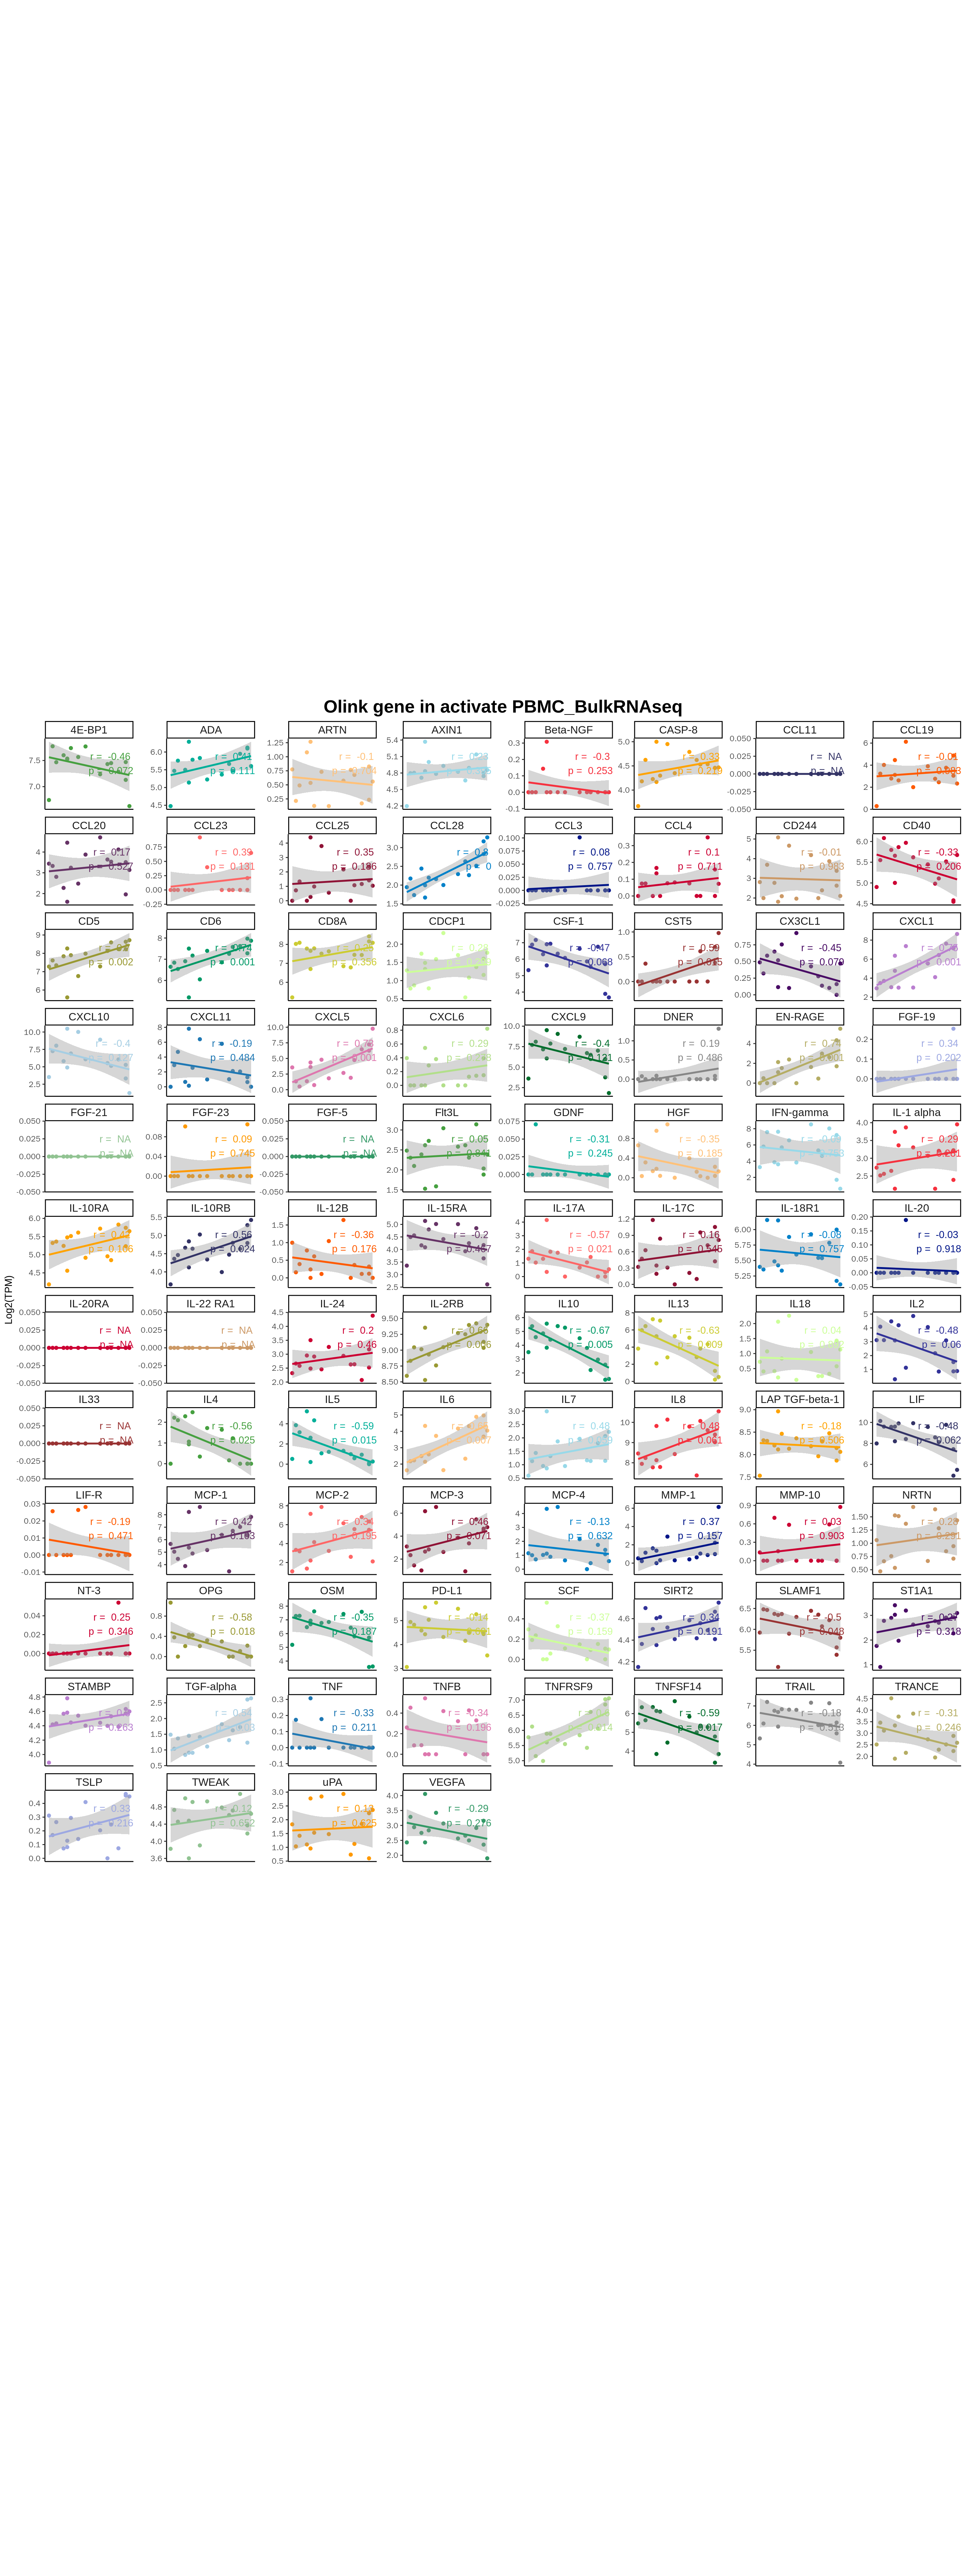

In [57]:
%%R -w 3000 -h 8000 -r 200
colorname2=c("#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333",
"#490C65", "#BA7FD0","#A6CEE3", "#1F78B4", "#DE77AE", "#B2DF8A", "#006D2C", "#868686", "#B5AD64","#9DA8E2","#91C392","#FF9900","#339966","#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333")
colorname3=rep(colorname2,5)
# # Plot
P1=PBMC_tpm_olinkRPlong %>%
  ggplot(aes(x = sample_numeric, y = value, color =Assay)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, formula = y ~ x) +
 
  theme_classic() +
  xlab('') +
  scale_x_continuous(breaks = unique(PBMC_tpm_olinkRPlong$sample_numeric), labels = unique(PBMC_tpm_olinkRPlong$sample_numeric)) +
  facet_wrap(~Assay, scales = "free", labeller = label_value,ncol = 8) +
  theme(  axis.text.x = element_blank(),
        legend.position = "none",  axis.ticks.x = element_blank(),
#          axis.ticks.x = element_blank(),
        strip.text.x = element_text(size = 12),
        strip.text.y = element_text(size = 12),aspect.ratio = 0.8)+ylab('Log2(TPM)')+ 
  geom_text(data =PBMC_tpm_olinkRP,
            aes(x = Inf, y = Inf, 
                label = paste("\n","r = ", round(r, 2), "\np = ", round(p, 3))),
            hjust = 1, vjust = 1)+scale_color_manual(values = colorname3)+ggtitle('Olink gene in activate PBMC_BulkRNAseq')+theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold"))
P1

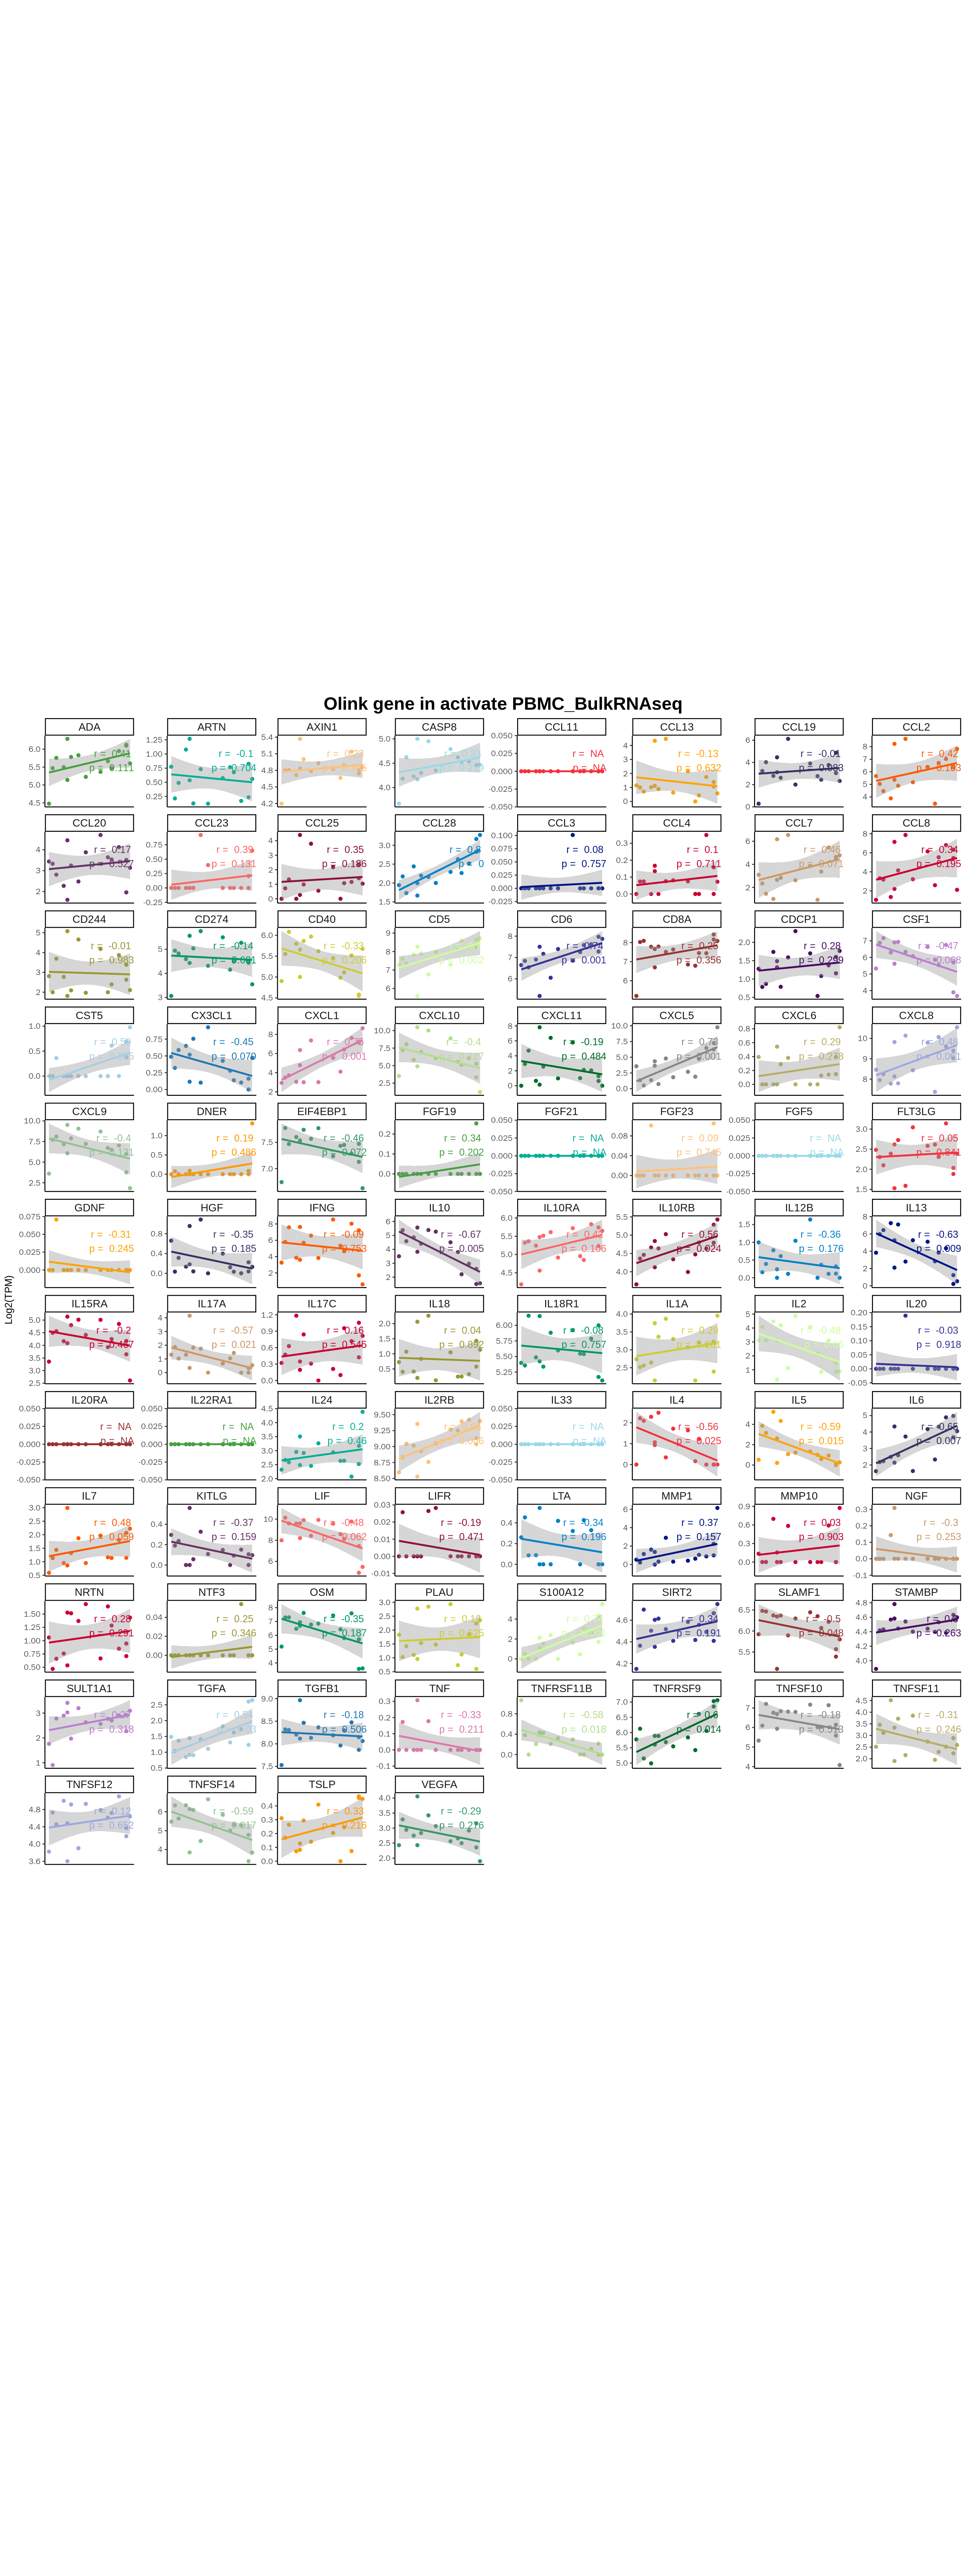

In [44]:
# %%R -w 3000 -h 8000 -r 200
# colorname2=c("#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
# "#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333",
# "#490C65", "#BA7FD0","#A6CEE3", "#1F78B4", "#DE77AE", "#B2DF8A", "#006D2C", "#868686", "#B5AD64","#9DA8E2","#91C392","#FF9900","#339966","#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
# "#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333")
# colorname3=rep(colorname2,5)
# # # Plot
# P1=PBMC_tpm_olink_long %>%
#   ggplot(aes(x = sample_numeric, y = value, color =OlinkGene)) +
#   geom_point() +
#   geom_smooth(method = "lm", se = TRUE, formula = y ~ x) +
 
#   theme_classic() +
#   xlab('') +
#   scale_x_continuous(breaks = unique(PBMC_tpm_olink_long$sample_numeric), labels = unique(PBMC_tpm_olink_long$sample_numeric)) +
#   facet_wrap(~ OlinkGene, scales = "free", labeller = label_value,ncol = 8) +
#   theme(  axis.text.x = element_blank(),
#         legend.position = "none",  axis.ticks.x = element_blank(),
# #          axis.ticks.x = element_blank(),
#         strip.text.x = element_text(size = 12),
#         strip.text.y = element_text(size = 12),aspect.ratio = 0.8)+ylab('Log2(TPM)')+ 
#   geom_text(data =PBMC_tpm_olink_longP,
#             aes(x = Inf, y = Inf, 
#                 label = paste("\n","r = ", round(r, 2), "\np = ", round(p, 3))),
#             hjust = 1, vjust = 1)+scale_color_manual(values = colorname3)+ggtitle('Olink gene in activate PBMC_BulkRNAseq')+theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold"))
# P1

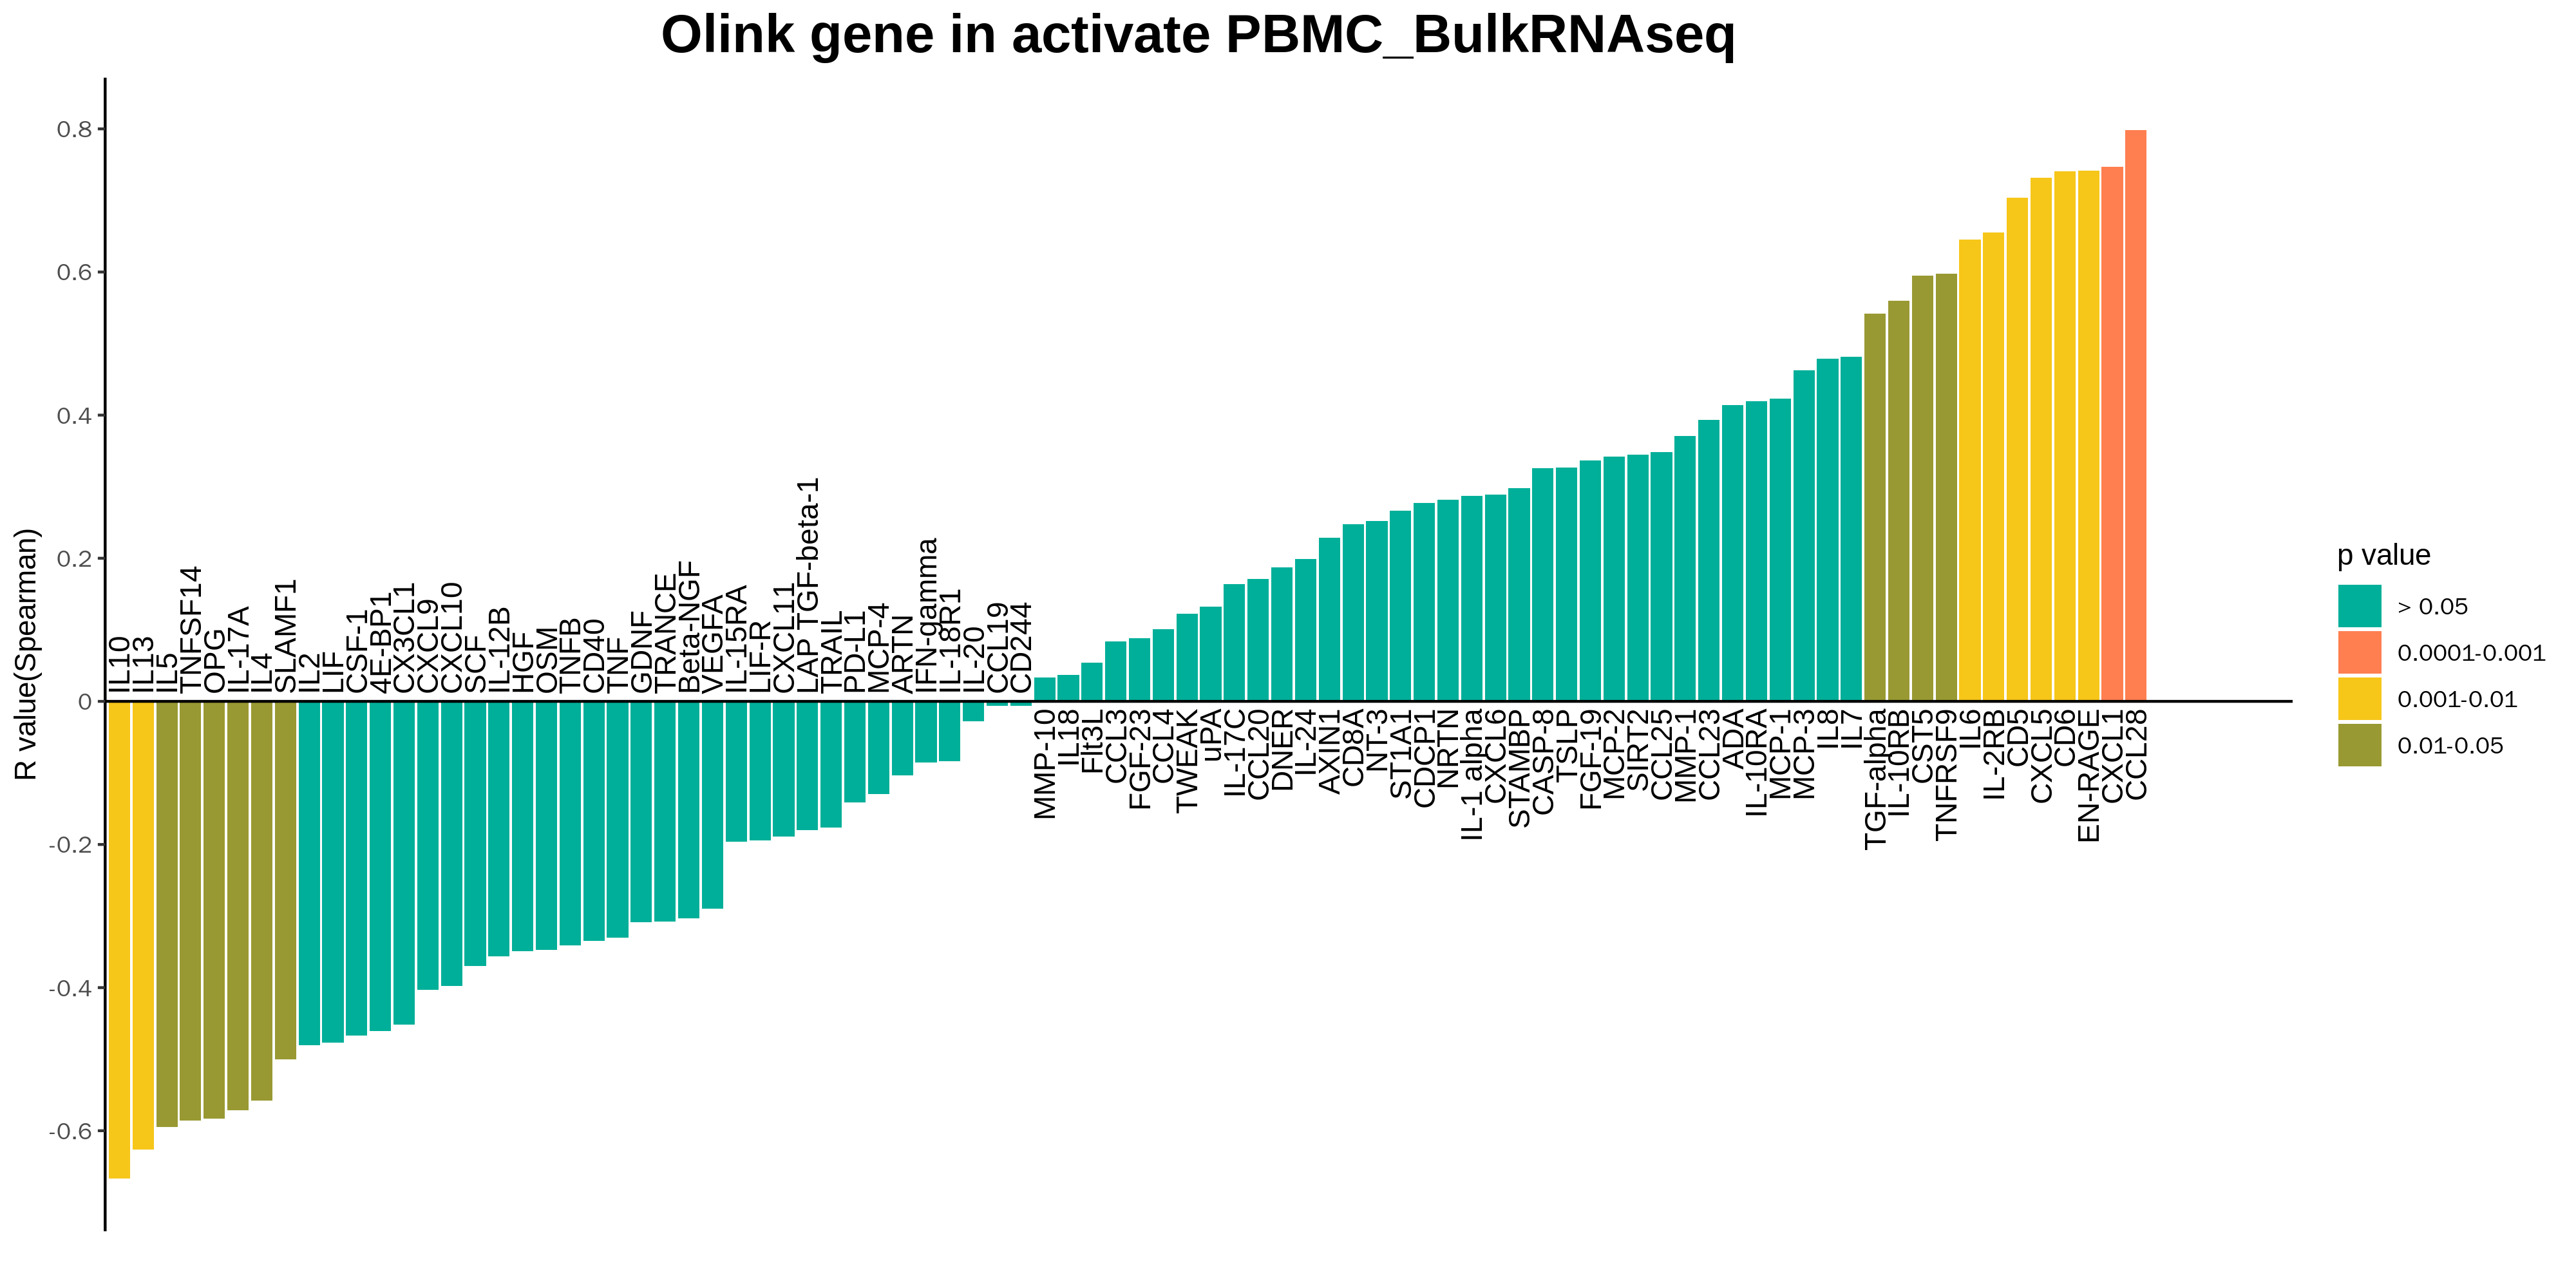

In [58]:
%%R -w 4000 -h 2000 -r 300
create_plot <- function(df) {
  # 创建一个新的分类变量来表示p值的区间
  df$pvalue <- cut(df$p,
                       breaks = c(0, 0.0001, 0.001, 0.01, 0.05, Inf),
                       labels = c('< 0.0001', '0.0001-0.001', '0.001-0.01', '0.01-0.05', '> 0.05'),
                       include.lowest = TRUE)

  # 创建一个颜色向量来为每个p值区间指定颜色
  colors <- c('< 0.0001' = '#F6313E', '0.0001-0.001' = '#FF7F50', '0.001-0.01' = "#f6c619", '0.01-0.05' = "#999933", '> 0.05' = '#00AF99')

  plot <- ggplot(df, aes(x = reorder(Assay, r), y = r, fill = pvalue, label =Assay)) +
    geom_bar(stat = "identity") +
    scale_fill_manual(values = colors) +
    theme_classic() +
    theme(
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      axis.line.x = element_blank(),
      axis.line.y = element_line(color = "black", size = 0.5)
    ) +
    labs(x = "Gene", y = "R value(Spearman)", fill = "p value") +
    geom_hline(yintercept = 0, linetype = "solid", color = "black", size = 0.5) +
    geom_text(aes(y = ifelse(r> 0, -0.01, 0.01), angle = 90), hjust = ifelse(df$r > 0, 1, 0), vjust = 0.5) +
    xlab('')+ scale_y_continuous(breaks = seq(-1,1,0.2),labels = seq(-1, 1, by = 0.2)) 
  
  return(plot)
}

# data = read.table('C:\\Users\\17323\\Documents\\cor.txt', header = T, sep = '\t')
plot <- create_plot(PBMC_tpm_olinkRP  )+ggtitle('Olink gene in activate PBMC_BulkRNAseq')+theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold"))
print(plot)
# ggsave(plot = plot,'ResultsOlink/Plasma_olink.pdf',width = 16,height = 5)

In [60]:
%%R -w 3000 -h 4000 -r 200
ggsave(plot=plot,'../All_scanpyData/Figure_V2/Olink_activate_PBMC_BulkRNAseq_Pvalue.pdf',width = 16,height = 5)

In [59]:
%%R -w 3000 -h 4000 -r 200
ggsave(plot=P1,'../All_scanpyData/Figure_V2/Olink_activate_PBMC_BulkRNAseq.pdf')

Saving 15 x 20 in image
